<a href="https://colab.research.google.com/github/JonathanJuradoS/Clasificacion/blob/main/Boosting_Comparacion_GB_XGB_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting: Gradient Boosting y XGBoost
Este notebook compara dos algoritmos de boosting con visualización 2D, 3D y comparación con árbol de decisión.

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Datos simulados
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos
modelo_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
modelo_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
modelo_dt = DecisionTreeClassifier(max_depth=3)

# Entrenamiento
modelo_gb.fit(X_train, y_train)
modelo_xgb.fit(X_train, y_train)
modelo_dt.fit(X_train, y_train)

print("Precisión Gradient Boosting:", modelo_gb.score(X_test, y_test))
print("Precisión XGBoost:", modelo_xgb.score(X_test, y_test))
print("Precisión Árbol de Decisión:", modelo_dt.score(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:52:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precisión Gradient Boosting: 0.9666666666666667
Precisión XGBoost: 0.9666666666666667
Precisión Árbol de Decisión: 0.9666666666666667


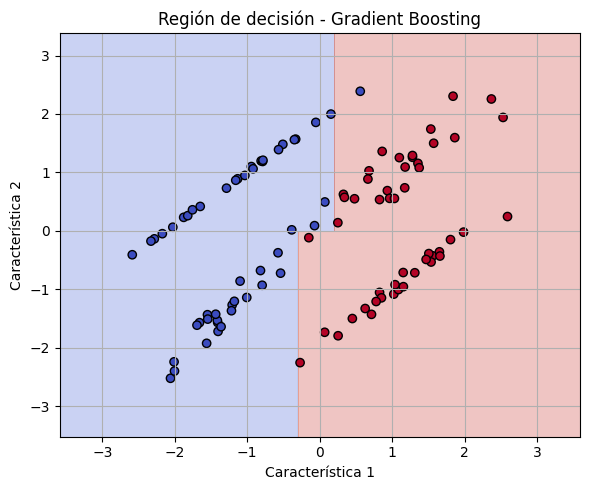

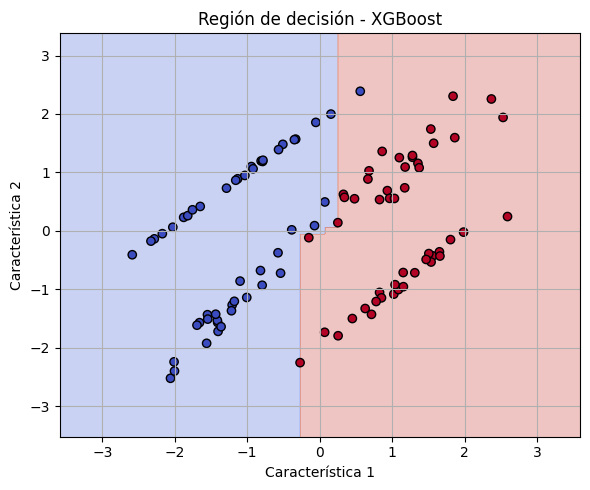

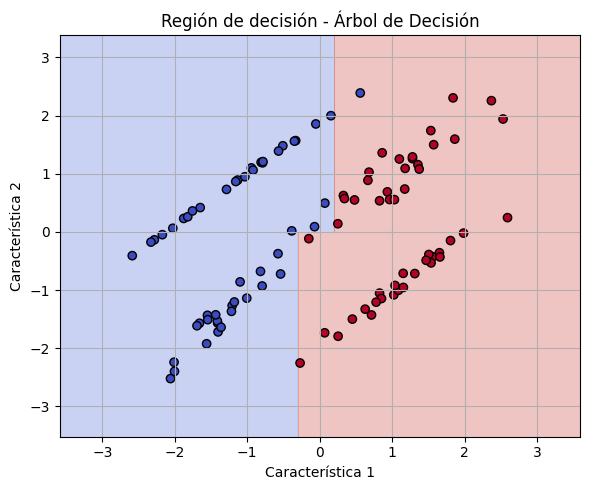

In [2]:
# Región de decisión 2D
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

def plot_decision_boundary(model, title):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_decision_boundary(modelo_gb, "Región de decisión - Gradient Boosting")
plot_decision_boundary(modelo_xgb, "Región de decisión - XGBoost")
plot_decision_boundary(modelo_dt, "Región de decisión - Árbol de Decisión")


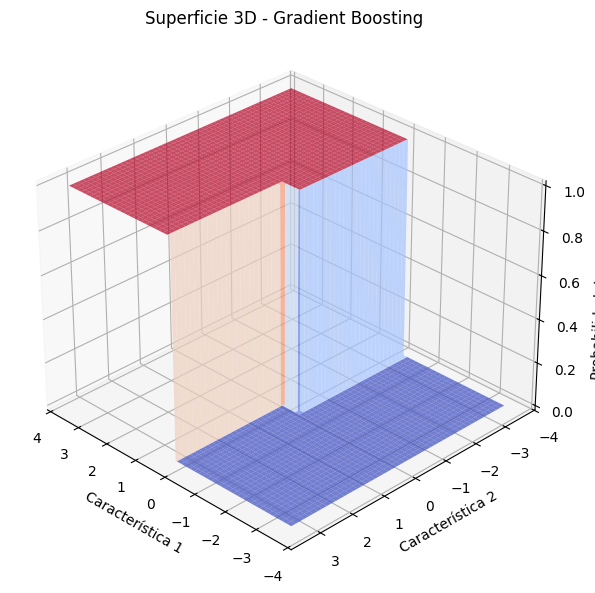

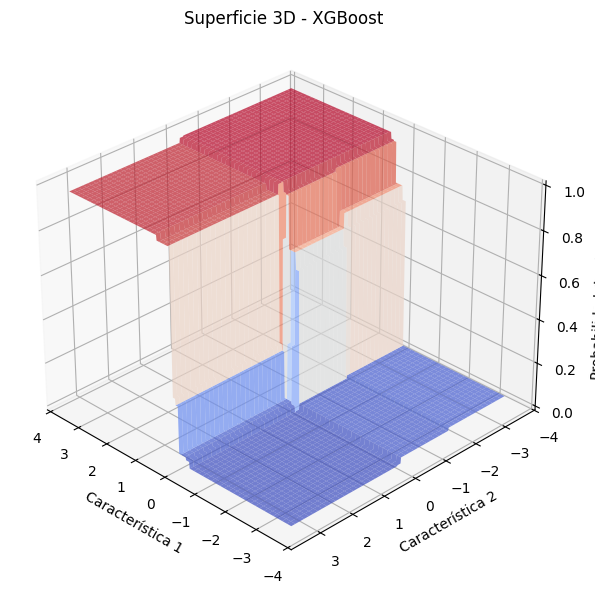

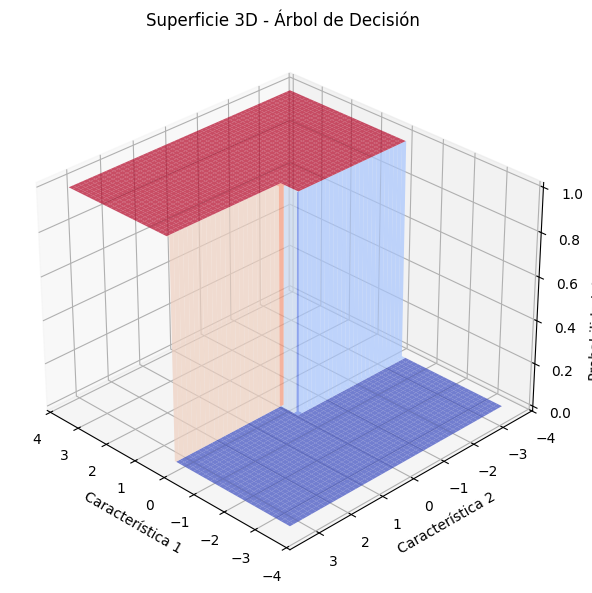

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_surface_3d(model, title):
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm, edgecolor='none', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("Característica 1")
    ax.set_ylabel("Característica 2")
    ax.set_zlabel("Probabilidad de clase 1")
    ax.view_init(elev=30, azim=135)
    plt.tight_layout()
    plt.show()

plot_surface_3d(modelo_gb, "Superficie 3D - Gradient Boosting")
plot_surface_3d(modelo_xgb, "Superficie 3D - XGBoost")
plot_surface_3d(modelo_dt, "Superficie 3D - Árbol de Decisión")


### ✅ Conclusiones

- **Gradient Boosting** y **XGBoost** generan fronteras de decisión más suaves y precisas en comparación con un solo árbol de decisión.
- Ambos métodos capturan patrones complejos al corregir errores de modelos anteriores.
- XGBoost tiende a ofrecer **mayor rendimiento y velocidad**, especialmente en conjuntos de datos grandes.
- La visualización 3D muestra cómo varía la probabilidad de clasificación en el espacio de entrada.
- En problemas reales, Boosting suele ser una de las mejores opciones para **maximizar la precisión**.
